# Imports Libraries and Defines Variables

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# calculating time spent
import time
total_time = time.time()

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from tensorflow.python.keras.applications.resnet import ResNet50, ResNet101, ResNet152
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
 
import tensorflow as tf
import random as rn
from tensorflow import keras

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

# Python script for confusion matrix creation.
import itertools 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [0]:
Apple___Apple_scab_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Apple___Apple_scab'
Apple___Black_rot_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Apple___Black_rot'
Grape___Black_rot_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Grape___Black_rot'
Grape___Esca_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Grape___Esca_(Black_Measles)'
Grape___Leaf_blight_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
Potato___Early_blight_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Potato___Early_blight'
Potato___Late_blight_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Potato___Late_blight'
Tomato___Bacterial_spot_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Tomato___Bacterial_spot'
Tomato___Septoria_leaf_spot_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Tomato___Septoria_leaf_spot'
Tomato___Target_Spot_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Tomato___Target_Spot'

X=[]
Z=[]

NUM_CLASSES=10
CHANNELS=3
IMG_SIZE=224
BATCH_SIZE=32

TEST_SIZE=0.3
LEARNING_RATE=0.001
NUM_EPOCHS=20

RESNET_POOLING='avg'
RESNET_WEIGHTS='imagenet'
DENSE_LAYER_ACTIVATION='relu'
OUTPUT_DENSE_LAYER_ACTIVATION='softmax'
OBJECTIVE_FUNCTION='categorical_crossentropy'
LOSS_METRICS=['accuracy']

# Makes Train and Test Data

In [0]:
def assign_label(img,plantdisease_type):
    return plantdisease_type
    
def make_train_data(plantdisease_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,plantdisease_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [5]:
make_data_time = time.time()
make_train_data('Apple Scab',Apple___Apple_scab_DIR)
print(len(X))
make_train_data('Apple Black rot',Apple___Black_rot_DIR)
print(len(X))
make_train_data('Grape Black Rot',Grape___Black_rot_DIR)
print(len(X))
make_train_data('Grape Esca',Grape___Esca_DIR)
print(len(X))
make_train_data('Grape Leaf blight',Grape___Leaf_blight_DIR)
print(len(X))
make_train_data('Potato Early blight',Potato___Early_blight_DIR)
print(len(X))
make_train_data('Potato Late blight',Potato___Late_blight_DIR)
print(len(X))
make_train_data('Tomato Bacterial spot',Tomato___Bacterial_spot_DIR)
print(len(X))
make_train_data('Tomato Septoria leaf spot',Tomato___Septoria_leaf_spot_DIR)
print(len(X))
make_train_data('Tomato Target spot',Tomato___Target_Spot_DIR)
print(len(X))
make_data_time_spent=time.time() - make_data_time

100%|██████████| 500/500 [04:50<00:00,  1.72it/s]


500


100%|██████████| 500/500 [04:49<00:00,  1.73it/s]


1000


100%|██████████| 500/500 [03:56<00:00,  2.11it/s]


1500


100%|██████████| 500/500 [03:59<00:00,  2.08it/s]


2000


100%|██████████| 500/500 [05:05<00:00,  1.63it/s]


2500


100%|██████████| 500/500 [04:15<00:00,  1.95it/s]


3000


100%|██████████| 500/500 [04:32<00:00,  1.84it/s]


3500


100%|██████████| 500/500 [04:30<00:00,  1.85it/s]


4000


100%|██████████| 500/500 [04:34<00:00,  1.82it/s]


4500


100%|██████████| 500/500 [04:42<00:00,  1.77it/s]

5000


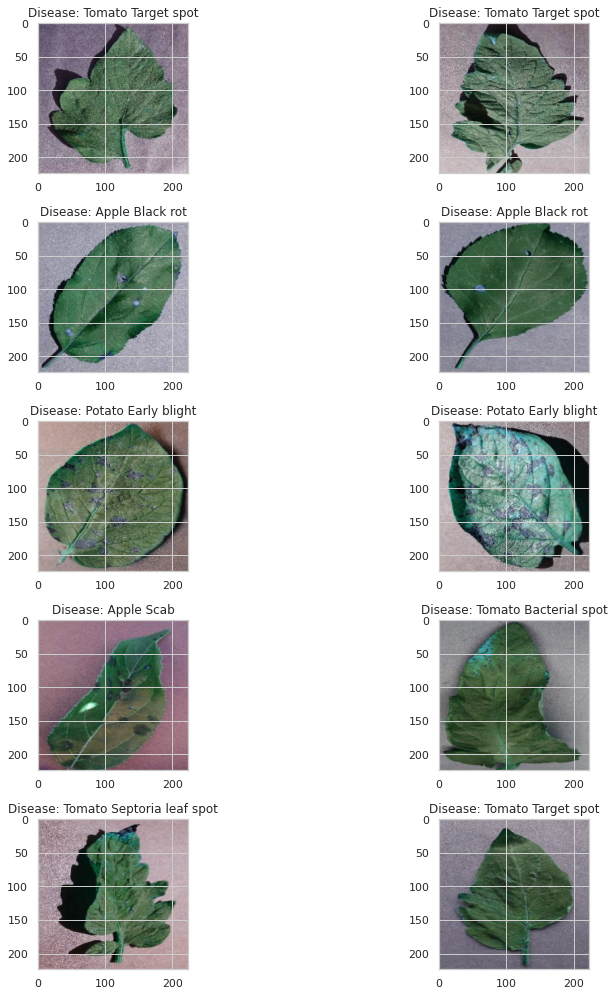

In [6]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(14,14)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Disease: '+Z[l])
        
plt.tight_layout()

In [0]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,10)
X=np.array(X)
X=X/255

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=42)

In [9]:
x_train.shape

(3500, 224, 224, 3)

In [10]:
x_test.shape

(1500, 224, 224, 3)

In [11]:
y_train.shape

(3500, 10)

In [12]:
y_test.shape

(1500, 10)

In [0]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

# Builds and Compiles the Model

In [14]:
resnet101_model= ResNet101(include_top=False, pooling=RESNET_POOLING, weights=RESNET_WEIGHTS, input_shape=(IMG_SIZE,IMG_SIZE,CHANNELS))

171450368/171446536 [==============================] - 4s 0us/step


In [0]:
model = Sequential()
model.add(resnet101_model)
model.add(BatchNormalization())
model.add(Dense(256, activation=DENSE_LAYER_ACTIVATION))
model.add(BatchNormalization())
model.add(Dense(128, activation=DENSE_LAYER_ACTIVATION))
model.add(BatchNormalization())
model.add(Dense(64, activation=DENSE_LAYER_ACTIVATION))
model.add(BatchNormalization())
model.add(Dense(NUM_CLASSES, activation=OUTPUT_DENSE_LAYER_ACTIVATION))
model.layers[0].trainable=False

In [0]:
ADAM = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(optimizer=ADAM, loss=OBJECTIVE_FUNCTION, metrics=LOSS_METRICS)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101 (Model)            (None, 2048)              42658176  
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8

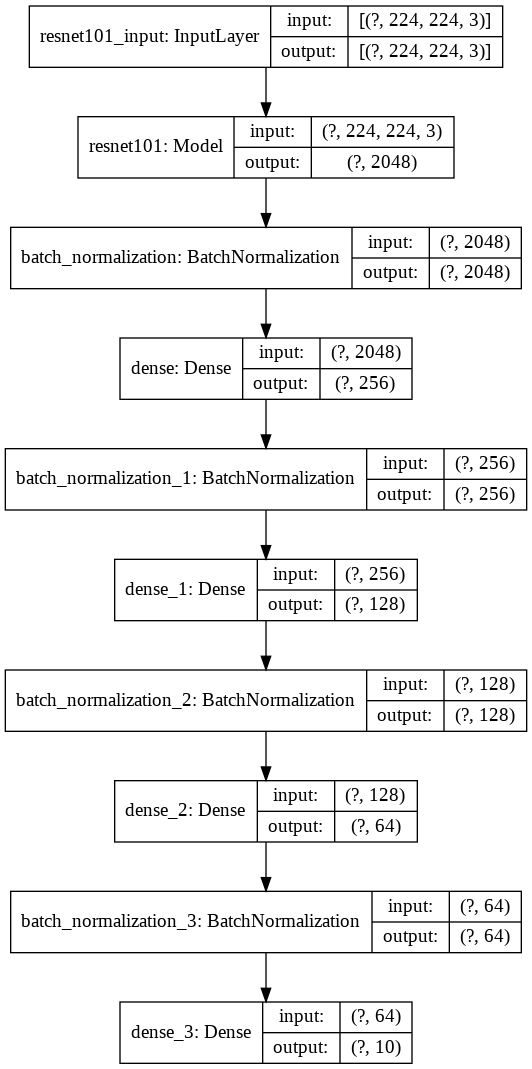

In [18]:
keras.utils.plot_model(model, "model_architecture.png", show_shapes=True)

In [19]:
train_time = time.time()
fit_history = model.fit(x_train,
                        y_train,
                        epochs=NUM_EPOCHS,
                        batch_size=BATCH_SIZE,
                        validation_data =(x_test,y_test))
train_time_spent=time.time() - train_time

Epoch 1/20
110/110 [==============================] - 482s 4s/step - loss: 1.4091 - accuracy: 0.5186 - val_loss: 2.3721 - val_accuracy: 0.0973
Epoch 2/20
110/110 [==============================] - 480s 4s/step - loss: 0.9030 - accuracy: 0.6937 - val_loss: 2.1710 - val_accuracy: 0.1467
Epoch 3/20
110/110 [==============================] - 481s 4s/step - loss: 0.7739 - accuracy: 0.7300 - val_loss: 2.0120 - val_accuracy: 0.2113
Epoch 4/20
110/110 [==============================] - 491s 4s/step - loss: 0.6700 - accuracy: 0.7780 - val_loss: 1.3665 - val_accuracy: 0.5220
Epoch 5/20
110/110 [==============================] - 484s 4s/step - loss: 0.5987 - accuracy: 0.7954 - val_loss: 0.8943 - val_accuracy: 0.6833
Epoch 6/20
110/110 [==============================] - 481s 4s/step - loss: 0.5148 - accuracy: 0.8180 - val_loss: 0.8234 - val_accuracy: 0.7333
Epoch 7/20
110/110 [==============================] - 481s 4s/step - loss: 0.5035 - accuracy: 0.8237 - val_loss: 0.8172 - val_accuracy: 0.7247

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

47/47 - 145s - loss: 0.7775 - accuracy: 0.7567
Test accuracy: 0.7566666603088379


# Visualizes the Result

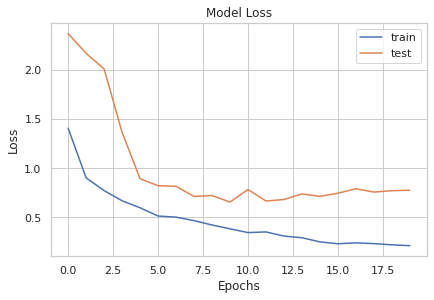

In [21]:
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

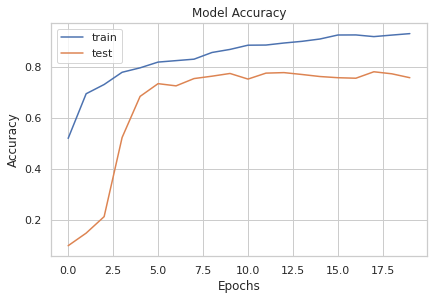

In [22]:
plt.plot(fit_history.history['accuracy'])
plt.plot(fit_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

Report : 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       152
           1       0.84      0.66      0.74       164
           2       0.78      0.80      0.79       155
           3       0.84      0.72      0.78       154
           4       0.82      0.81      0.81       143
           5       0.79      0.85      0.82       141
           6       0.61      0.73      0.66       143
           7       0.78      0.62      0.69       158
           8       0.52      0.73      0.61       132
           9       0.81      0.77      0.79       158

    accuracy                           0.76      1500
   macro avg       0.77      0.76      0.76      1500
weighted avg       0.77      0.76      0.76      1500



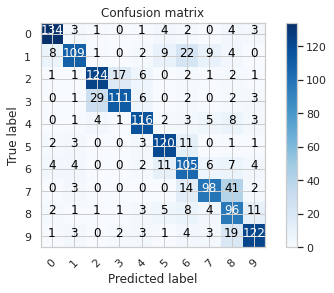

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

plot_confusion_matrix(confusion_mtx, classes = range(10))

print('Report : ')
print(classification_report(Y_true, Y_pred_classes))

In [24]:
total_time_spent=time.time() - total_time

print('Making data time spent:', make_data_time_spent)
print('Training time spent:', train_time_spent)
print('Total time spent:', total_time_spent)

Making data time spent: 2801.3492465019226
Training time spent: 9757.494329214096
Total time spent: 12886.918989896774
